<img src="https://www.deviq.io/hs-fs/hubfs/DevIQ%20website%20active%20images/ai-ml-dl-ds-venn-diagram-deviq.png?width=449&name=ai-ml-dl-ds-venn-diagram-deviq.png" style="width:600px;height:370px" >

# **Types of learning:**
# 1-Supervised learning (Labeled data)
# 2-Unsupervised learning (Unlabeled data) 
# 3-Semi-Supervised learning (Labeled/Unlabeled data)
# 4-Re-inforcement learning/Self learning (Punishment and Rewards)

# **Types of models:**

# 1. Statistical Models:
Statistical models are characterized by their reliance on statistical theory and principles for inference, estimation, and making predictions. They often involve assumptions about the underlying data distribution and relationships.

* # Linear Regression:
A statistical model that assumes a linear relationship between the independent and dependent variables.

* # Logistic Regression:
Used for classification, it models the probability of a binary outcome based on input variables.

* # ANOVA (Analysis of Variance):
Used to analyze the variance between different groups in a dataset.

* # Time Series Models (ARIMA, Exponential Smoothing): 
Models designed specifically to handle time-dependent data and patterns.

* # Bayesian Models:
Incorporating Bayesian inference and probabilities to model uncertainty and update beliefs based on evidence.


# 2. Non-statistical Models

Non-statistical models encompass a broad array of algorithms and approaches that may not heavily rely on statistical assumptions or theories. These models might focus more on computational efficiency or learning from data patterns without a strong statistical foundation.

* # Neural Networks:
A non-statistical model that learns patterns from data through interconnected nodes inspired by the human brain.

*  # Decision Trees: 
Hierarchical tree-like structures used for classification and regression by partitioning the feature space.

* # Support Vector Machines (SVM):
Classifiers that find an optimal hyperplane between classes in a high-dimensional space.

* # Random Forests:
An ensemble learning method that constructs multiple decision trees to improve prediction accuracy.

* # K-Nearest Neighbors (KNN):
A non-parametric method for classification and regression based on the similarity of instances

# 3. Hybrid Models
Some models might incorporate elements of both statistical and non-statistical approaches, leveraging the strengths of each.

* # Ensemble Methods:
Techniques that combine multiple models (which could be both statistical and non-statistical) to improve performance, like boosting and bagging.

* # Deep Learning Architectures:
Neural network models with multiple layers that can incorporate statistical techniques for regularization and optimization.


# **Linear Regression**

<img src="https://machinelearningmastery.com/wp-content/uploads/2017/12/Scatter-Plot-of-Direct-Solution-to-the-Linear-Regression-Problem.png" style="width:600px;height:370px" >

<img src="https://toptipbio.com/wp-content/uploads/2021/03/Linear-regression-model-equation.jpg" style="width:600px;height:370px" >

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt 
import warnings 

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/houses-price/homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
df.area.min()

2600

In [5]:
df.area.max()

4000

# Y(price)= m(factor).(input area) + b(intercept)

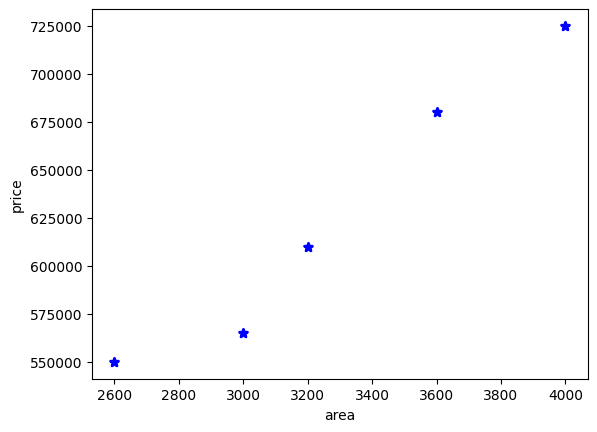

In [6]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price, color="blue", marker="*", linewidth = 2)
plt.show()

In [7]:
area = df.drop(columns = ["price"])
print(type(area))
area

<class 'pandas.core.frame.DataFrame'>


,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [8]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [9]:
#create linear regression object
reg = linear_model.LinearRegression() #instance the linear regression model
reg.fit(area,price)#fitting data into regression model(training)

LinearRegression()

In [10]:
#Predict any price by give it an area 
reg.predict([[3300]])

array([628715.75342466])

In [11]:
round(float(reg.predict([[3300]])),1)

628715.8

In [12]:
reg.predict([[2200], [3000], [4000]])

array([479349.31506849, 587979.45205479, 723767.12328767])

In [13]:
#Calculate accuracy 
reg.score(area,price) #model.score(x,y) x=features y=target 

0.9584301138199486

In [14]:
# to get the slope (m)
reg.coef_

array([135.78767123])

In [15]:
#to get the intercept (b)
reg.intercept_

180616.43835616432

In [16]:
df2 = pd.read_csv("/kaggle/input/houses-price-2/homeprices.csv")
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


<img src="https://raw.githubusercontent.com/codebasics/py/801ee0ee4d342fd22b89915dc0c4864250a0ec10/ML/2_linear_reg_multivariate/equation.jpg" style="width:600px;height:370px" >

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


In [18]:
df2.bedrooms.median()

4.0

In [19]:
#fill the missing value by the median 
df2.bedrooms.fillna(df2.bedrooms.median(), inplace=True)
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [20]:
x = df2.drop("price", axis="columns")
y = df2.price 

In [21]:
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [22]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [23]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [24]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

# m1 = 112.06244194
# m2 = 23388.88007794
# m3 = -3231.71790863

In [25]:
model.intercept_

221323.00186540396

In [26]:
# ([[area, bedrooms, age]])
model.predict([[3000, 3, 40]]) 

array([498408.25158031])

In [27]:
model.score(x,y)

0.9550196399325821